In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')
event = pd.read_csv('event_type.csv')
resource = pd.read_csv('resource_type.csv')
severity = pd.read_csv('severity_type.csv')
log = pd.read_csv('log_feature.csv')

In [5]:
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [6]:
event.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [7]:
resource.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [8]:
severity.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [9]:
log.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [10]:
df = pd.merge(event, resource, on ='id')
df1 = pd.merge(df, severity, on = 'id')
df2 = pd.merge(df1, log, on='id')

In [11]:
df2.head()

,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,event_type 11,resource_type 8,severity_type 2,feature 68,6
1,8011,event_type 15,resource_type 8,severity_type 2,feature 68,7
2,2597,event_type 15,resource_type 8,severity_type 2,feature 68,1
3,5022,event_type 15,resource_type 8,severity_type 1,feature 172,2
4,5022,event_type 15,resource_type 8,severity_type 1,feature 56,1


In [12]:
col = ['event_type','resource_type','severity_type','log_feature']

for i in range(len(col)):
    df2[col[i]] = df2[col[i]].map(lambda x: x.split()[1])

In [13]:
df2.head()

,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,11,8,2,68,6
1,8011,15,8,2,68,7
2,2597,15,8,2,68,1
3,5022,15,8,1,172,2
4,5022,15,8,1,56,1


In [14]:
t1 = train.drop('fault_severity', 1)
t1.head()

,id,location
0,14121,location 118
1,9320,location 91
2,14394,location 152
3,8218,location 931
4,14804,location 120


In [15]:
t1['location'] = t1['location'].map(lambda x: x.split('location ')[1])

In [16]:
t1.head()

,id,location
0,14121,118
1,9320,91
2,14394,152
3,8218,931
4,14804,120


In [17]:
df3 = pd.merge(t1, df2, on='id', how='left')
df3.head()

,id,location,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,34,2,2,312,19
1,14121,118,34,2,2,232,19
2,14121,118,35,2,2,312,19
3,14121,118,35,2,2,232,19
4,9320,91,34,2,2,315,200


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 7 columns):
id               61839 non-null int64
location         61839 non-null object
event_type       61839 non-null object
resource_type    61839 non-null object
severity_type    61839 non-null object
log_feature      61839 non-null object
volume           61839 non-null int64
dtypes: int64(2), object(5)
memory usage: 3.8+ MB


In [19]:
df3['location'].value_counts().head(20)

794     1425
821     1190
734     1048
126     1044
124      784
802      750
13       742
122      720
744      690
1107     686
102      665
242      658
471      626
1095     602
816      600
691      569
745      541
627      530
495      526
476      516
Name: location, dtype: int64

In [20]:
df3['location'].median()

607.0

(array([ 6623., 11835., 14085., 13649., 15647.]),
 array([  0. , 185.6, 371.2, 556.8, 742.4, 928. ]),
 <a list of 5 Patch objects>)

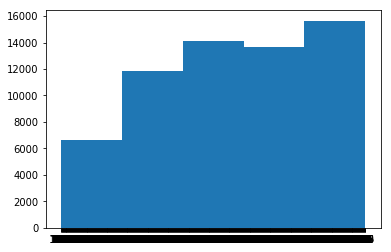

In [21]:
plt.hist(df3['location'], bins = 5)

In [22]:
train1 = train.copy()
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [23]:
train1['location'] = train['location'].map(lambda x: x.split('location ')[1].split()[0][0])
train1.head()

,id,location,fault_severity
0,14121,1,1
1,9320,9,0
2,14394,1,1
3,8218,9,1
4,14804,1,0


In [24]:
train1['location'].value_counts()

1    1933
8    1064
4     928
7     802
9     744
6     653
2     490
3     401
5     366
Name: location, dtype: int64

In [25]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


(array([1933.,  490.,  401.,  928.,  366.,  653.,  802., 1064.,  744.]),
 array([0.        , 0.88888889, 1.77777778, 2.66666667, 3.55555556,
        4.44444444, 5.33333333, 6.22222222, 7.11111111, 8.        ]),
 <a list of 9 Patch objects>)

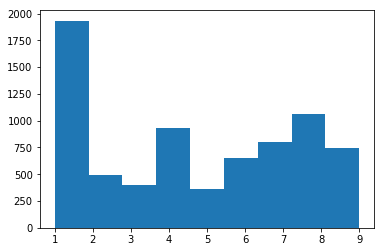

In [26]:
plt.hist(train1['location'], bins = 9)

In [27]:
import seaborn as sns

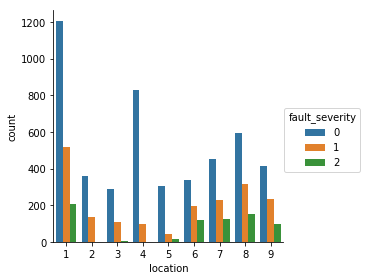

In [28]:
sns.factorplot('location', data = train1, hue = 'fault_severity', kind = 'count')

In [29]:
pd.pivot_table(train1, index = ['fault_severity'], columns = 'location', aggfunc = np.count_nonzero, 
               fill_value = 0, margins = True)

# fs 2 = more on loc 6-9
# fs 1 = more on loc 6-9; close to or more than 50% of total
# fs 0 = more on loc 1-5

id                                               
location           1    2    3    4    5    6    7     8    9   All
fault_severity                                                     
0               1206  357  289  831  303  340  454   592  412  4784
1                519  133  108   96   45  193  226   318  233  1871
2                208    0    4    1   18  120  122   154   99   726
All             1933  490  401  928  366  653  802  1064  744  7381

In [30]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [31]:
train1['location'] = train1['location'].astype(int)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null int64
fault_severity    7381 non-null int64
dtypes: int64(3)
memory usage: 173.1 KB


In [32]:
a = train1[train1['location'] > 6]
a.count()

id                2610
location          2610
fault_severity    2610
dtype: int64

In [33]:
train1['loc'] = train1['location'].apply(lambda z: z>6)

In [34]:
train1.head()

,id,location,fault_severity,loc
0,14121,1,1,False
1,9320,9,0,True
2,14394,1,1,False
3,8218,9,1,True
4,14804,1,0,False


In [35]:
train1['location'] = train1['location'].astype(object)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 4 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
loc               7381 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 180.3+ KB


In [36]:
train1['loc'] = train1['loc'].astype(str)
train1.head()

,id,location,fault_severity,loc
0,14121,1,1,False
1,9320,9,0,True
2,14394,1,1,False
3,8218,9,1,True
4,14804,1,0,False


In [37]:
d = {'True':1, 'False':0}
train1['loc'] = train1['loc'].map(d)

In [38]:
train1.head()

,id,location,fault_severity,loc
0,14121,1,1,0
1,9320,9,0,1
2,14394,1,1,0
3,8218,9,1,1
4,14804,1,0,0


In [39]:
df4 = df3.copy()
df4.head()

,id,location,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,34,2,2,312,19
1,14121,118,34,2,2,232,19
2,14121,118,35,2,2,312,19
3,14121,118,35,2,2,232,19
4,9320,91,34,2,2,315,200


In [40]:
df5 = pd.merge(train1, df4, on='id', how='left')
df5

,id,location_x,fault_severity,loc,location_y,event_type,resource_type,severity_type,log_feature,volume
0,14121,1,1,0,118,34,2,2,312,19
1,14121,1,1,0,118,34,2,2,232,19
2,14121,1,1,0,118,35,2,2,312,19
3,14121,1,1,0,118,35,2,2,232,19
4,9320,9,0,1,91,34,2,2,315,200
5,9320,9,0,1,91,34,2,2,235,116
6,9320,9,0,1,91,35,2,2,315,200
7,9320,9,0,1,91,35,2,2,235,116
8,14394,1,1,0,152,35,2,2,221,1
9,14394,1,1,0,152,35,2,2,301,1


In [41]:
df6 = pd.get_dummies(df5, drop_first=True)
df6.head()

,id,fault_severity,loc,volume,location_x_2,location_x_3,location_x_4,location_x_5,location_x_6,location_x_7,...,log_feature_9,log_feature_90,log_feature_91,log_feature_92,log_feature_94,log_feature_95,log_feature_96,log_feature_97,log_feature_98,log_feature_99
0,14121,1,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14121,1,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14121,1,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14121,1,0,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9320,0,1,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df7 = df6.groupby('id').sum()
df7.head()

,fault_severity,loc,volume,location_x_2,location_x_3,location_x_4,location_x_5,location_x_6,location_x_7,location_x_8,...,log_feature_9,log_feature_90,log_feature_91,log_feature_92,log_feature_94,log_feature_95,log_feature_96,log_feature_97,log_feature_98,log_feature_99
id,,,,,,,,,,,,,,,,,,,,,
1,12,0,20,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,34,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2,0,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,32,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0,0,4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df7.reset_index(level= 'id', inplace = True)

In [44]:
df7.head()

,id,fault_severity,loc,volume,location_x_2,location_x_3,location_x_4,location_x_5,location_x_6,location_x_7,...,log_feature_9,log_feature_90,log_feature_91,log_feature_92,log_feature_94,log_feature_95,log_feature_96,log_feature_97,log_feature_98,log_feature_99
0,1,12,0,20,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0,0,34,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,2,0,2,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0,0,32,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,0,0,4,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.model_selection import train_test_split as tts
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV as gscv

/Users/jedvillareal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jedvillareal/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [46]:
g = gbc()

In [47]:
x = df7.drop('fault_severity', 1)
y = df7['fault_severity']

In [48]:
x.shape

(7381, 1330)

In [49]:
x = x.astype(object)

In [50]:
x['volume'] = x['volume'].astype(int)

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Columns: 1330 entries, id to log_feature_99
dtypes: int64(1), object(1329)
memory usage: 74.9+ MB


In [52]:
del x['id']

In [53]:
y.shape

(7381,)

In [54]:
Xtrain, Xtest, Ytrain, Ytest = tts(x,y, test_size = .2, random_state = 0)

In [55]:
g.fit(Xtrain,Ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [56]:
g.score(Xtrain,Ytrain)

0.8672086720867209

In [57]:
g.score(Xtest,Ytest)

0.7102234258632363

In [58]:
g1 = gbc(n_estimators=100, min_samples_split=20, min_samples_leaf=3, learning_rate=.1,
                               max_depth=15, min_weight_fraction_leaf=0.0, max_leaf_nodes=None, max_features='sqrt',
                               subsample= 1, loss='deviance', init=None, random_state=0, verbose=0,
                               warm_start=False,presort='auto')

In [59]:
g1.fit(x,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=15,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1, verbose=0,
              warm_start=False)

In [60]:
print('Accuracy of train, ', g1.score(Xtrain,Ytrain))
print('Accuracy of test ,', g1.score(Xtest,Ytest))
print('Difference is ,', (g1.score(Xtrain,Ytrain) - g.score(Xtest,Ytest))*100)

Accuracy of train,  0.9009146341463414
Accuracy of test , 0.9106296547054841
Difference is , 19.069120828310517


In [63]:
from sklearn.model_selection import cross_val_score as cvs

In [64]:
score = cvs(g1,x,y, cv=5, scoring = 'accuracy')

/Users/jedvillareal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [65]:
score

array([0.69636964, 0.71708305, 0.71147318, 0.716244  , 0.72401927])